In [15]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *


from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, CategoricalNB
from sklearn.model_selection import train_test_split

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

%precision %.7g

'%.7g'

In [16]:
buyDress = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/buyDress.csv")
buyDress.head()

,buy,size,over40,favColor
0,1,m,0,Red
1,1,s,1,Blue
2,1,l,0,Green
3,1,l,0,Blue
4,1,m,1,Green


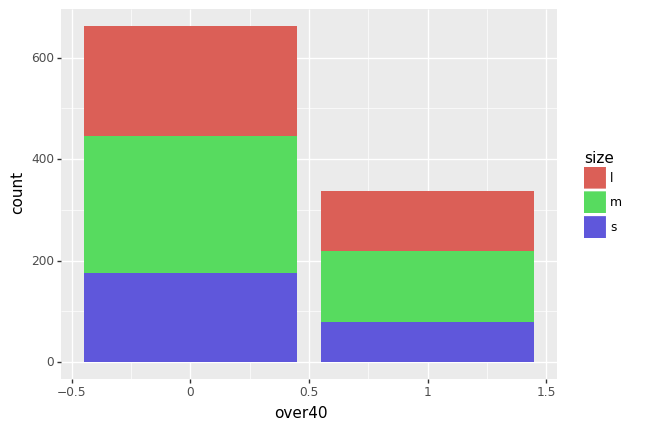

<ggplot: (315277909)>

In [17]:
(ggplot(buyDress, aes("over40"))
    + geom_bar(aes(fill = "size")))

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [25]:
buyDress["favColor"] = le.fit_transform(buyDress["favColor"])
buyDress["size"] = le.fit_transform(buyDress["size"])

In [26]:
buyDress.head()

,buy,size,over40,favColor
0,1,1,0,2
1,1,2,1,0
2,1,0,0,1
3,1,0,0,0
4,1,1,1,1


[0.0, 0.492, 0.392, 0.352]
0.309


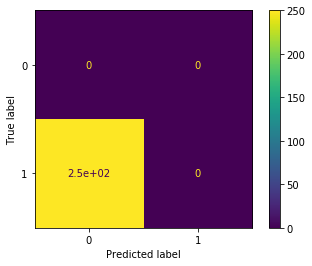

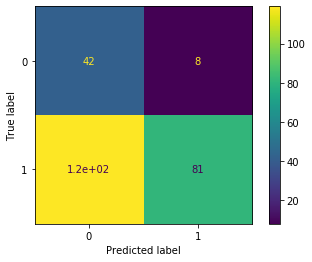

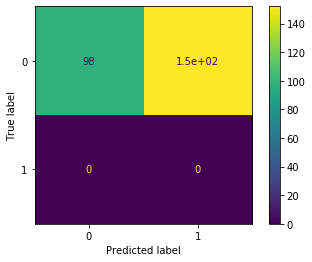

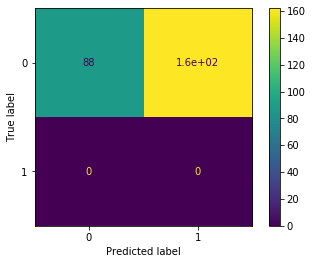

In [27]:
X = buyDress[["size", "over40", "favColor"]]
y = buyDress["buy"]


kf = KFold(n_splits = 4)
nb = CategoricalNB()
acc = []
for train, test in kf.split(X,y):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y[train]
    y_test = y[test]
    
    
    
    nb.fit(X_train,y_train)
    acc.append(nb.score(X_test,y_test))
    plot_confusion_matrix(nb, X_test,y_test)
    
print(acc)
print(np.mean(acc))

In [29]:
pred = ["size", "over40", "favColor"]
X = buyDress[pred]
y = buyDress["buy"]

buy = np.where(y == 1)[0]
nobuy = np.where(y == 0)[0]

nobuyDownSample = np.random.choice(nobuy, size = len(buy), replace = False)

downSampledData = np.concatenate([buy,nobuyDownSample])
downSampledData

X_d = buyDress.iloc[downSampledData,][pred]
y_d = buyDress.iloc[downSampledData,]["buy"]

X_d.shape

(900, 3)

0.5888888888888889


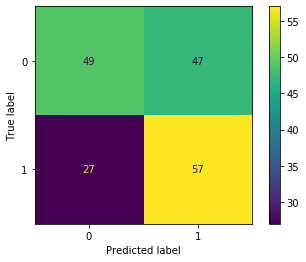

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_d,y_d, test_size = 0.2, shuffle = True)

nb = CategoricalNB()

nb.fit(X_train,y_train)

print(nb.score(X_test,y_test))

plot_confusion_matrix(nb, X_test,y_test)